In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loan=pd.read_csv(r'../input/loan-prediction-analytics-vidhya/train_ctrUa4K.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Target variable (Loan Status)

In [7]:
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

##### Among 614 Loan_Status : Accepted : 422 Rejected : 192

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

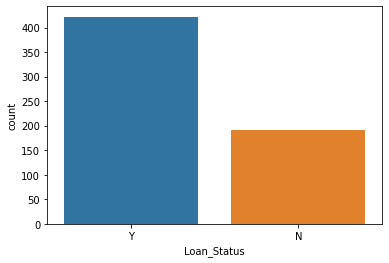

In [8]:
sns.countplot(data=loan,x='Loan_Status')

## Independent variables (Categorical)
 ( 'Gender', 'Married', 'Self employed', 'Credit history' )

## Gender

In [9]:
loan['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

#### Among 601 person: Male : 489 Female : 112



<AxesSubplot:xlabel='Gender', ylabel='count'>

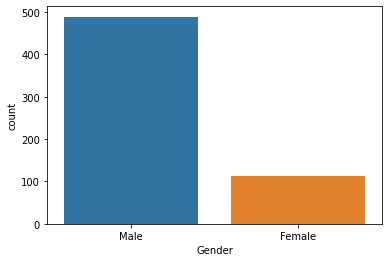

In [10]:
sns.countplot(data=loan,x='Gender')

<AxesSubplot:title={'center':'Gender'}>

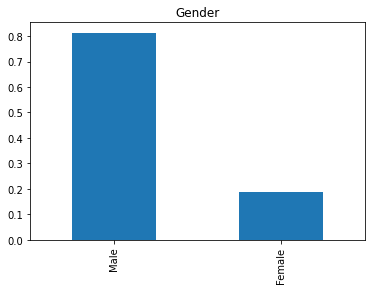

In [11]:
loan['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

#### the "Gender" variable contain Male : 81% Female: 19%


In [12]:
loan.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

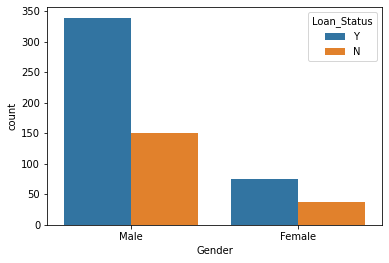

In [13]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan)

Number of Female whose Loan was approved : 75

Number of Male whose Loan was approved : 339

Number of Female whose Loan was not approved : 37

Number of Male whose Loan was not approved : 150

Proportion of Male applicants is higher for the approved loans.

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

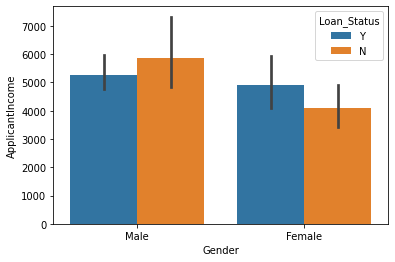

In [14]:
sns.barplot(x='Gender',hue='Loan_Status',y='ApplicantIncome',data=loan)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

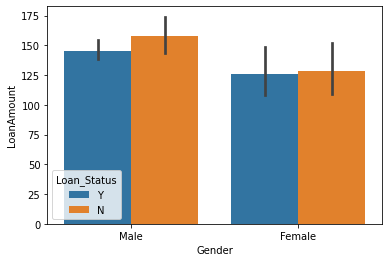

In [15]:
sns.barplot(x='Gender',hue='Loan_Status',y='LoanAmount',data=loan)

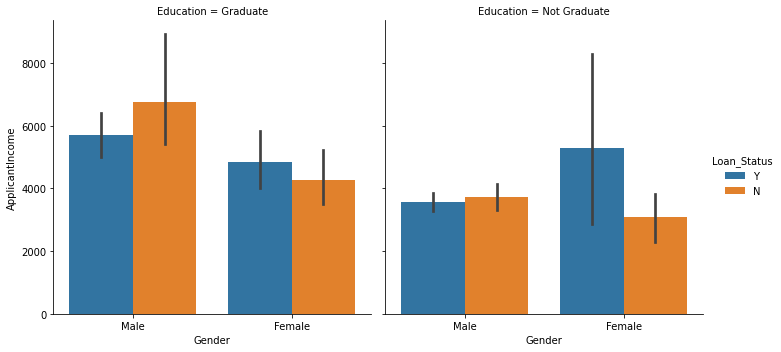

In [16]:
sns.catplot(x='Gender',hue='Loan_Status',y='ApplicantIncome',data=loan,kind='bar',col='Education')

## Married

In [17]:
loan['Married'].count()

611

In [18]:
loan['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

##### Total number of people : 611

Married : 398

Unmarried : 213


<AxesSubplot:xlabel='Married', ylabel='count'>

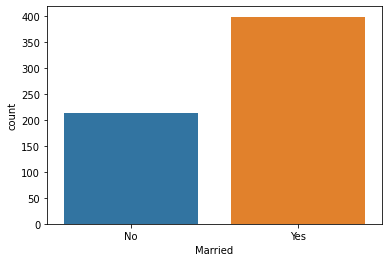

In [19]:
sns.countplot(data=loan,x='Married')

<AxesSubplot:title={'center':'Married'}>

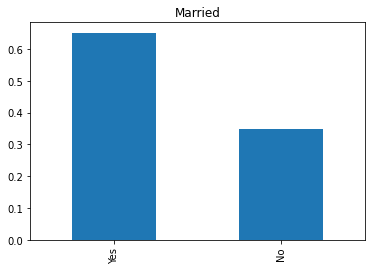

In [20]:
loan['Married'].value_counts(normalize=True).plot.bar(title='Married')

#### From the Grapch we see that :

Number of married people : 65%

Number of unmarried people : 35%

In [21]:
loan.groupby('Married')['Loan_Status'].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

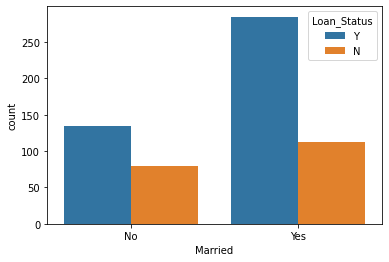

In [22]:
sns.countplot(x='Married',hue='Loan_Status',data=loan)

Number of married people whose Loan was approved : 285

Number of married people whose Loan was not approved : 113

Number of unmarried people whose Loan was approved : 134

Number of unmarried people whose Loan was not approved : 79

Proportion of Married applicants is higher for the approved loans.

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

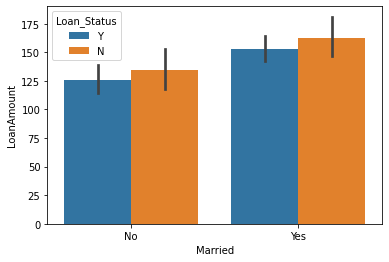

In [23]:
sns.barplot(x='Married',hue='Loan_Status',y='LoanAmount',data=loan)

<AxesSubplot:xlabel='Married', ylabel='ApplicantIncome'>

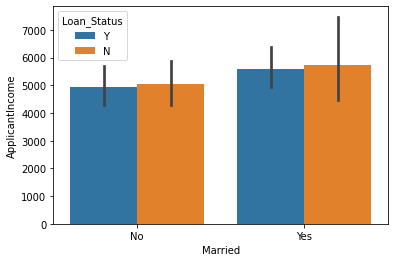

In [24]:
sns.barplot(x='Married',hue='Loan_Status',y='ApplicantIncome',data=loan)

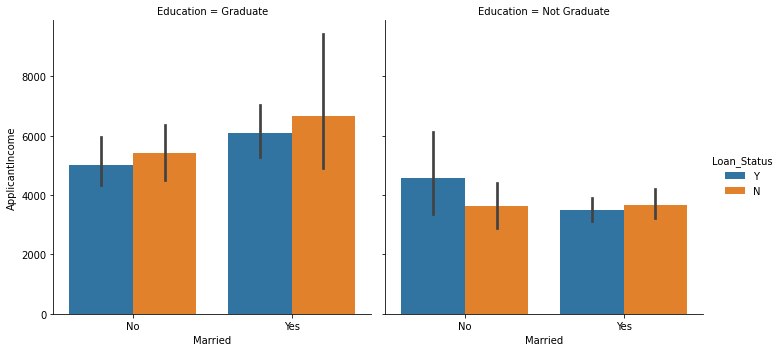

In [25]:
sns.catplot(x='Married',hue='Loan_Status',y='ApplicantIncome',data=loan,kind='bar',col='Education')

## Self_Employed

In [26]:
loan['Self_Employed'].count()

582

In [27]:
loan['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

#### Total number of people : 582

Self_Employed : 82

Not_Self_Employed : 500

<AxesSubplot:title={'center':'Self Employed'}>

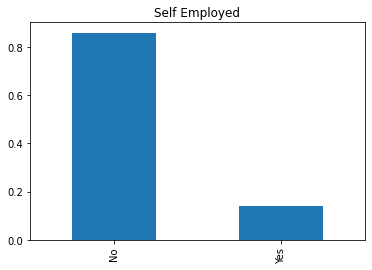

In [28]:
loan['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')

##### Among 582 people only 14% are Self_Employed and rest of the 86% are Not_Self_Employed



In [29]:
loan.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

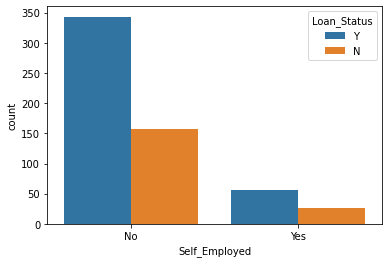

In [30]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan)

People who are Self_Employed and Loan was approved : 56

People who are Self_Employed and Loan was not approved : 26

People who are not Self_Employed and Loan was approved : 343

People who are not Self_Employed and Loan was not approved : 157

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

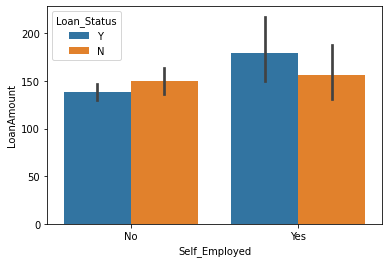

In [31]:
sns.barplot(x='Self_Employed',hue='Loan_Status',y='LoanAmount',data=loan)

<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

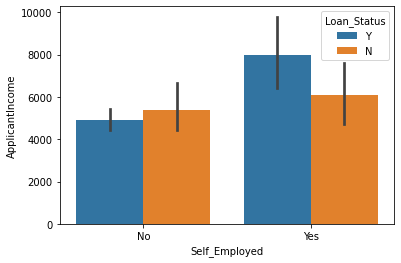

In [32]:
sns.barplot(x='Self_Employed',hue='Loan_Status',y='ApplicantIncome',data=loan)

## Credit History 

In [33]:
loan['Credit_History'].count()

564

In [34]:
loan.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

#### Total number of debts : 564

Repaid Debts : 475

Not Repaid Debts : 89

<AxesSubplot:title={'center':'Credit History'}>

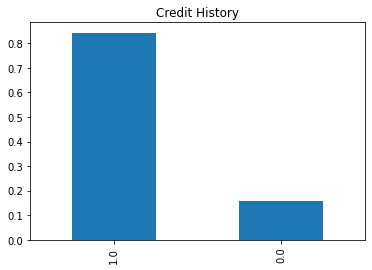

In [35]:
loan.Credit_History.value_counts(normalize=True).plot.bar(title='Credit History')

##### Around 84% applicants have repaid their debts.



In [36]:
loan.groupby('Credit_History')['Loan_Status'].value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

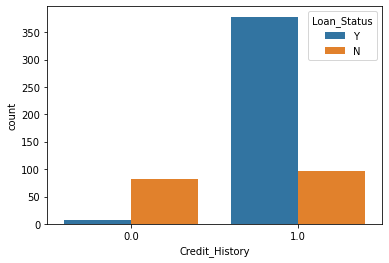

In [37]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=loan)

People with credit history as 1 and loan was approved : 378

People with credit history as 1 and loan was not approved : 97

People with credit history as 0 and loan was approved : 7

People with credit history as 0 and loan was not approved : 82

It seems people with credit history as 1 are more likely to get their loans approved.

<AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>

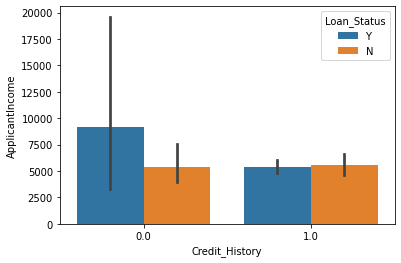

In [38]:
sns.barplot(x='Credit_History',hue='Loan_Status',y='ApplicantIncome',data=loan)

## Independent variables (Ordinal)
(Dependents, Education, Property_Area)


## Dependents

In [39]:
loan.Dependents.count()

599

In [40]:
loan.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Number of 0 Dependent : 345

Number of 1 Dependent : 102

Number of 2 Dependesnt : 101

Number of 3+ Dependent : 51

<AxesSubplot:title={'center':'Dependents'}>

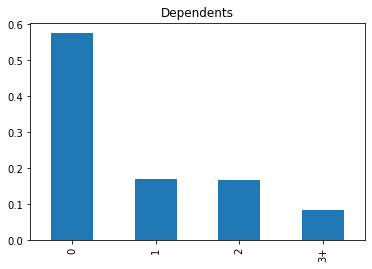

In [41]:
loan.Dependents.value_counts(normalize=True).plot.bar(title='Dependents')

58% people have 0 dependent

17% people have 1 dependent

17% people have 2 dependent

8% people have 3+ dependent

In [42]:
loan.groupby('Dependents')['Loan_Status'].value_counts()

Dependents  Loan_Status
0           Y              238
            N              107
1           Y               66
            N               36
2           Y               76
            N               25
3+          Y               33
            N               18
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

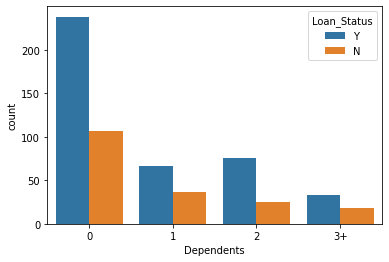

In [43]:
sns.countplot(x='Dependents',hue='Loan_Status',data=loan)

Number of dependents on the loan applicant : 0 and Loan was approved : 238

Number of dependents on the loan applicant : 0 and Loan was not approved : 107

Number of dependents on the loan applicant : 1 and Loan was approved : 66

Number of dependents on the loan applicant : 1 and Loan was not approved : 36

Number of dependents on the loan applicant : 2 and Loan was approved : 76

Number of dependents on the loan applicant : 2 and Loan was not approved : 25

Number of dependents on the loan applicant : 3+ and Loan was approved : 33

Number of dependents on the loan applicant : 3+ and Loan was not approved : 18

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

<AxesSubplot:xlabel='Dependents', ylabel='ApplicantIncome'>

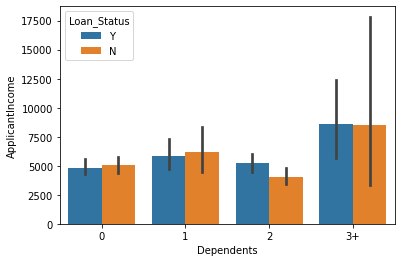

In [44]:
sns.barplot(x='Dependents',hue='Loan_Status',y='ApplicantIncome',data=loan)

## Education

In [45]:
loan.Education.count()

614

In [46]:
loan.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

People who are Graduated : 480

People who are not Graduated : 134

<AxesSubplot:title={'center':'Education'}>

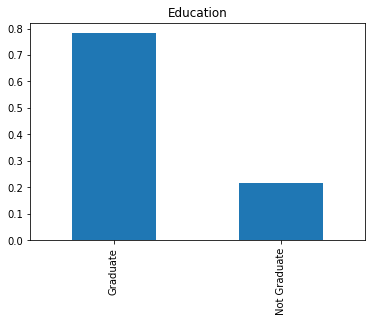

In [47]:
loan.Education.value_counts(normalize=True).plot.bar(title='Education')

Total number of People : 614

78% are Graduated and 22% are not Graduated

In [48]:
loan.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

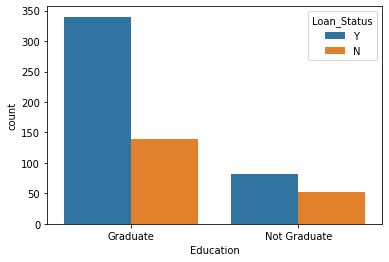

In [49]:
sns.countplot(x='Education',hue='Loan_Status',data=loan)

Number of people who are Graduate and Loan was approved : 340

Number of people who are Graduate and Loan was no approved : 140

Number of people who are Not Graduate and Loan was approved : 82

Number of people who are Not Graduate and Loan was not approved : 52

Proportion of Graduate applicants is higher for the approved loans.

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

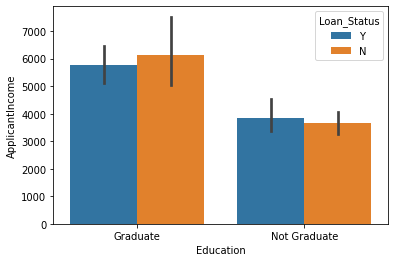

In [50]:
sns.barplot(x='Education',hue='Loan_Status',y='ApplicantIncome',data=loan)

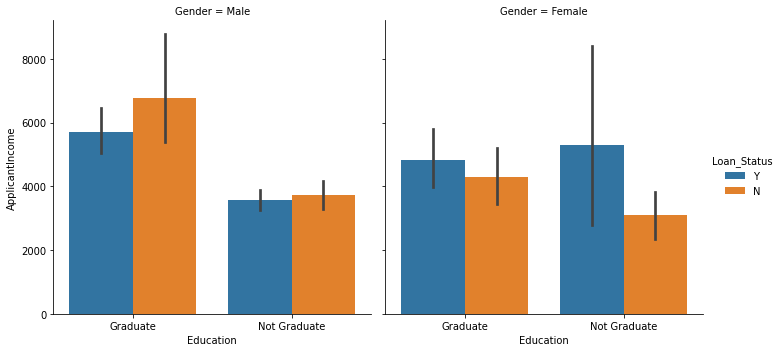

In [51]:
sns.catplot(x='Education',hue='Loan_Status',y='ApplicantIncome',data=loan,kind='bar',col='Gender')

## Property_Area

In [52]:
loan.Property_Area.count()

614

In [53]:
loan.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Total number of People : 614

People from Semiurban area : 233

People from Urban area : 202

People from Rural area : 179

<AxesSubplot:title={'center':'Property_Area'}>

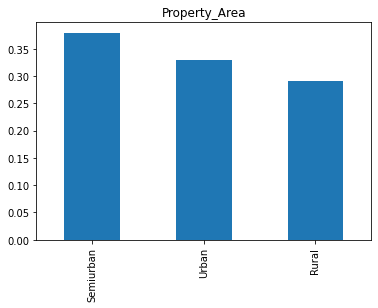

In [54]:
loan.Property_Area.value_counts(normalize=True).plot.bar(title='Property_Area')

38% people from Semiurban area

33% people from Urban area

29% people from Rural area

In [55]:
loan.groupby('Property_Area')['Loan_Status'].value_counts()

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

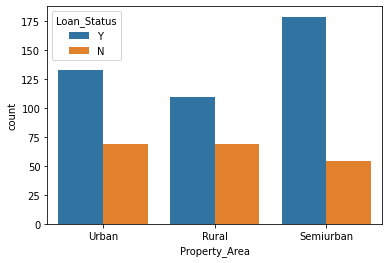

In [56]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan)

People who are from Rural area and loan was approved : 110

People who are from Rural area and loan was not approved : 69

People who are from Semiurban area and loan was approved : 179

People who are from Semiurban area and loan was not approved : 54

People who are from Urban area and loan was approved : 133

People who are from Semiurban area and loan was not approved : 69

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

## Independent Variable (Numerical)
(ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

## ApplicantIncome

In [57]:
loan[['ApplicantIncome']].describe()

,ApplicantIncome
count,614.000000
mean,5403.459283
std,6109.041673
min,150.000000
25%,2877.500000
50%,3812.500000
75%,5795.000000
max,81000.000000


(array([ 17., 224., 182.,  81.,  29.,  25.,  15.,   7.,   5.,   7.,   6.,
          3.,   5.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  150.,  1767.,  3384.,  5001.,  6618.,  8235.,  9852., 11469.,
        13086., 14703., 16320., 17937., 19554., 21171., 22788., 24405.,
        26022., 27639., 29256., 30873., 32490., 34107., 35724., 37341.,
        38958., 40575., 42192., 43809., 45426., 47043., 48660., 50277.,
        51894., 53511., 55128., 56745., 58362., 59979., 61596., 63213.,
        64830., 66447., 68064., 69681., 71298., 72915., 74532., 76149.,
        77766., 79383., 81000.]),
 <BarContainer object of 50 artists>)

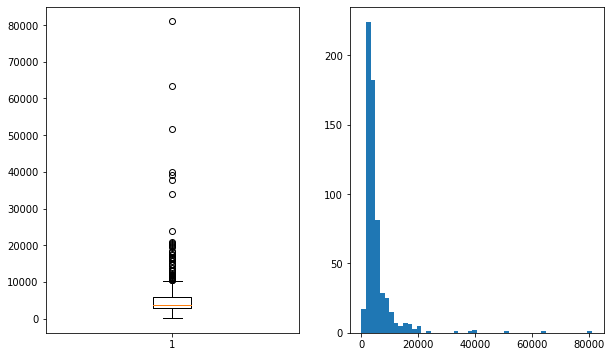

In [58]:
fig ,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].boxplot(loan['ApplicantIncome'])
ax[1].hist(loan['ApplicantIncome'],bins=50)


The boxplot confirms the presence of a lot of outliers/extreme values

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

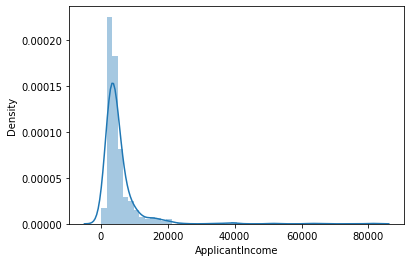

In [59]:
sns.distplot(loan.ApplicantIncome)

the data in the distribution of applicant income is towards left which means it is not normally distributed

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

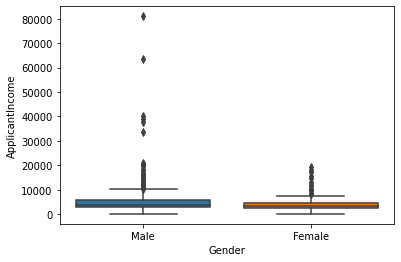

In [60]:
sns.boxplot(data=loan,y='ApplicantIncome',x='Gender')


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 50.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 36.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

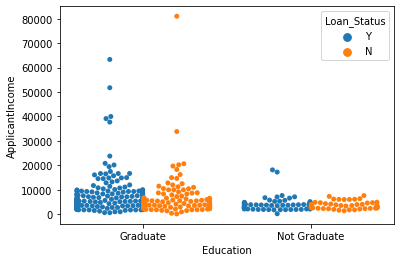

In [61]:
sns.swarmplot(y='ApplicantIncome',x='Education',hue='Loan_Status',data=loan,dodge=True)

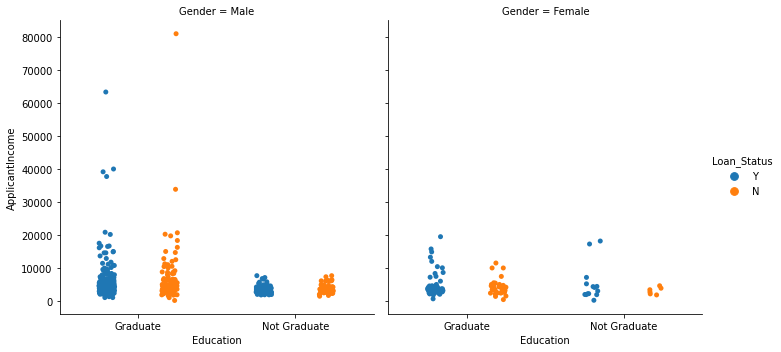

In [62]:
sns.catplot(y='ApplicantIncome',x='Education',hue='Loan_Status',col='Gender',data=loan,dodge=True)

## CoapplicantIncome

In [63]:
loan.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

<AxesSubplot:>

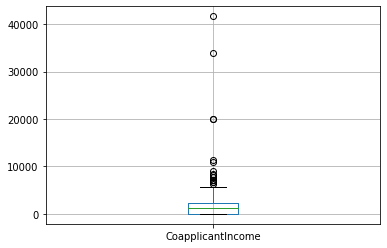

In [64]:
loan[['CoapplicantIncome']].boxplot()


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

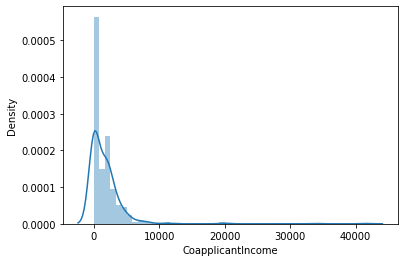

In [65]:
sns.distplot(loan.CoapplicantIncome)

distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 56.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Education', ylabel='CoapplicantIncome'>

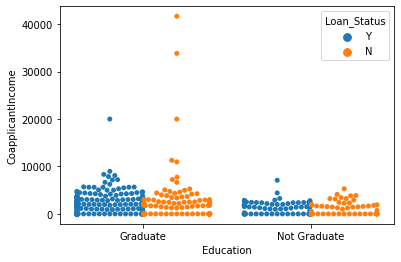

In [66]:
sns.swarmplot(y='CoapplicantIncome',x='Education',hue='Loan_Status',data=loan,dodge=True)

## LoanAmount

In [67]:
loan[['LoanAmount']].describe()

,LoanAmount
count,592.000000
mean,146.412162
std,85.587325
min,9.000000
25%,100.000000
50%,128.000000
75%,168.000000
max,700.000000


<AxesSubplot:>

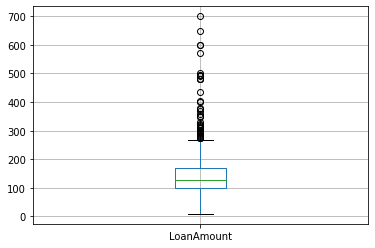

In [68]:
loan[['LoanAmount']].boxplot()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

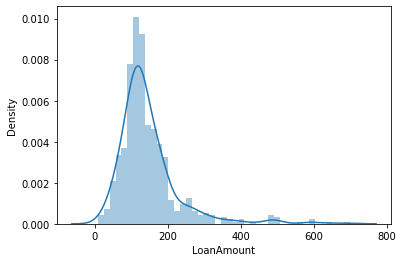

In [69]:
sns.distplot(loan.LoanAmount)

a lot of outliers in this variable and the distribution is fairly normal.

## LoanAmountTerm

In [70]:
loan.Loan_Amount_Term.describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

<AxesSubplot:>

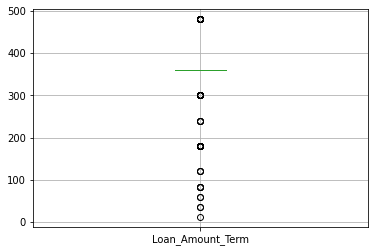

In [71]:
loan[['Loan_Amount_Term']].boxplot()

a lot of outliers in this variable and the distribution is fairly normal

In [72]:
loan['Status']=loan['Loan_Status']

In [73]:
loan.Status.replace('N', 0,inplace=True)
loan.Status.replace('Y', 1,inplace=True)


In [74]:
corr=loan.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

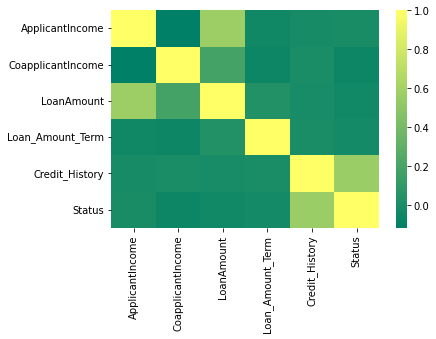

In [75]:
sns.heatmap(corr,cmap='summer')